## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

## 1. Collection de données

In [0]:
from pyspark.sql.types import IntegerType, TimestampType, StringType, DoubleType, StructType, StructField
schema = StructType([
  StructField("duration_sec",IntegerType(), True),
  StructField("start_time",TimestampType(), True),
  StructField("end_time",TimestampType(), True),
  StructField("start_station_id",IntegerType(), True),
  StructField("start_station_name",StringType(), True),
  StructField("start_station_latitude",DoubleType(), True),
  StructField("start_station_longitude",DoubleType(), True),
  StructField("end_station_id",IntegerType(), True),
  StructField("end_station_name",StringType(), True),
  StructField("end_station_latitude",DoubleType(), True),
  StructField("end_station_longitude",DoubleType(), True),
  StructField("bike_id",IntegerType(), True),
  StructField("user_type",StringType(), True),
  StructField("bike_share_for_all_trip",StringType(), True)
])

# File location and type
file_location = "/FileStore/tables/201802_fordgobike_tripdata.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .schema(schema) \
  .load(file_location)

display(df)

duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
598,2018-02-28T23:59:47.097+0000,2018-03-01T00:09:45.187+0000,284,Yerba Buena Center for the Arts (Howard St at 3rd St),37.7848720844,-122.4008756876,114,Rhode Island St at 17th St,37.7644783,-122.4025701,1035,Subscriber,No
943,2018-02-28T23:21:16.495+0000,2018-02-28T23:36:59.974+0000,6,The Embarcadero at Sansome St,37.80477,-122.403234,324,Union Square (Powell St at Post St),37.7882999782,-122.4085307121,1673,Customer,No
18587,2018-02-28T18:20:55.190+0000,2018-02-28T23:30:42.925+0000,93,4th St at Mission Bay Blvd S,37.7704074,-122.3911984,15,San Francisco Ferry Building (Harry Bridges Plaza),37.795392,-122.394203,3498,Customer,No
18558,2018-02-28T18:20:53.621+0000,2018-02-28T23:30:12.450+0000,93,4th St at Mission Bay Blvd S,37.7704074,-122.3911984,15,San Francisco Ferry Building (Harry Bridges Plaza),37.795392,-122.394203,3129,Customer,No
885,2018-02-28T23:15:12.858+0000,2018-02-28T23:29:58.608+0000,308,San Pedro Square,37.336802,-121.8940901,297,Locust St at Grant St,37.3229796,-121.8879312,1839,Subscriber,Yes
921,2018-02-28T23:14:19.170+0000,2018-02-28T23:29:40.437+0000,312,San Jose Diridon Station,37.329732,-121.901782,288,Mission St at 1st St,37.3509643,-121.9020161,2656,Customer,No
277,2018-02-28T23:21:49.274+0000,2018-02-28T23:26:27.222+0000,316,San Salvador St at 1st St,37.330165,-121.885831,310,San Fernando St at 4th St,37.335885,-121.88566,1616,Subscriber,No
285,2018-02-28T23:21:19.631+0000,2018-02-28T23:26:05.405+0000,198,Snow Park,37.8078131822,-122.264496088,196,Grand Ave at Perkins St,37.808893934,-122.2564601898,144,Subscriber,No
363,2018-02-28T23:19:18.606+0000,2018-02-28T23:25:22.274+0000,176,MacArthur BART Station,37.8284099731,-122.2663146257,189,Genoa St at 55th St,37.8396488,-122.2717561,3351,Subscriber,No
226,2018-02-28T23:15:20.033+0000,2018-02-28T23:19:06.620+0000,295,William St at 10th St,37.3327938,-121.8759263,327,5th St at San Salvador St,37.332038681,-121.8817663193,1699,Subscriber,Yes


Après chargement des données, on a changé le schema pour que les attributs ***start_time*** et ***end_time*** soient de type Timestamp.

In [0]:
# Create a view or table

temp_table_name = "201802_fordgobike_tripdata"

df.createOrReplaceTempView(temp_table_name)

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "201802_fordgobike_tripdata"

#df.write.format("parquet").saveAsTable(permanent_table_name)

In [0]:
%sql
/*Query the created temp table in a SQL cell*/

select * from 201802_fordgobike_tripdata

duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
598,2018-02-28T23:59:47.097+0000,2018-03-01T00:09:45.187+0000,284,Yerba Buena Center for the Arts (Howard St at 3rd St),37.7848720844,-122.4008756876,114,Rhode Island St at 17th St,37.7644783,-122.4025701,1035,Subscriber,No
943,2018-02-28T23:21:16.495+0000,2018-02-28T23:36:59.974+0000,6,The Embarcadero at Sansome St,37.80477,-122.403234,324,Union Square (Powell St at Post St),37.7882999782,-122.4085307121,1673,Customer,No
18587,2018-02-28T18:20:55.190+0000,2018-02-28T23:30:42.925+0000,93,4th St at Mission Bay Blvd S,37.7704074,-122.3911984,15,San Francisco Ferry Building (Harry Bridges Plaza),37.795392,-122.394203,3498,Customer,No
18558,2018-02-28T18:20:53.621+0000,2018-02-28T23:30:12.450+0000,93,4th St at Mission Bay Blvd S,37.7704074,-122.3911984,15,San Francisco Ferry Building (Harry Bridges Plaza),37.795392,-122.394203,3129,Customer,No
885,2018-02-28T23:15:12.858+0000,2018-02-28T23:29:58.608+0000,308,San Pedro Square,37.336802,-121.8940901,297,Locust St at Grant St,37.3229796,-121.8879312,1839,Subscriber,Yes
921,2018-02-28T23:14:19.170+0000,2018-02-28T23:29:40.437+0000,312,San Jose Diridon Station,37.329732,-121.901782,288,Mission St at 1st St,37.3509643,-121.9020161,2656,Customer,No
277,2018-02-28T23:21:49.274+0000,2018-02-28T23:26:27.222+0000,316,San Salvador St at 1st St,37.330165,-121.885831,310,San Fernando St at 4th St,37.335885,-121.88566,1616,Subscriber,No
285,2018-02-28T23:21:19.631+0000,2018-02-28T23:26:05.405+0000,198,Snow Park,37.8078131822,-122.264496088,196,Grand Ave at Perkins St,37.808893934,-122.2564601898,144,Subscriber,No
363,2018-02-28T23:19:18.606+0000,2018-02-28T23:25:22.274+0000,176,MacArthur BART Station,37.8284099731,-122.2663146257,189,Genoa St at 55th St,37.8396488,-122.2717561,3351,Subscriber,No
226,2018-02-28T23:15:20.033+0000,2018-02-28T23:19:06.620+0000,295,William St at 10th St,37.3327938,-121.8759263,327,5th St at San Salvador St,37.332038681,-121.8817663193,1699,Subscriber,Yes


Après création de la table **201802_fordgobike_tripdata**, on a chargé les données dans une dataframe Pandas afin de les nettoyer et visualiser.

In [0]:
#import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [0]:
spark_df = spark.sql("select *  from 201802_fordgobike_tripdata")
spark_df.head()

Out[5]: Row(duration_sec=598, start_time=datetime.datetime(2018, 2, 28, 23, 59, 47, 97000), end_time=datetime.datetime(2018, 3, 1, 0, 9, 45, 187000), start_station_id=284, start_station_name='Yerba Buena Center for the Arts (Howard St at 3rd St)', start_station_latitude=37.7848720844, start_station_longitude=-122.4008756876, end_station_id=114, end_station_name='Rhode Island St at 17th St', end_station_latitude=37.7644783, end_station_longitude=-122.4025701, bike_id=1035, user_type='Subscriber', bike_share_for_all_trip='No')

In [0]:
spark_df.show()

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+----------+-----------------------+
duration_sec| start_time| end_time|start_station_id| start_station_name|start_station_latitude|start_station_longitude|end_station_id| end_station_name|end_station_latitude|end_station_longitude|bike_id| user_type|bike_share_for_all_trip|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+----------+-----------------------+
 598|2018-02-28 23:59:...|2018-03-01 00:09:...| 284|Yerba Buena Cente...| 37.7848720844| -122.4008756876| 114|Rhode Island St a...| 37.7644783| -122.4025701| 1035|Subscriber| No|
 943|2018-02-28 23:21:...|2018-02-28 23:36:...| 6|The Embarcadero a...| 37.80477| -122.403234| 324|Union Square (Pow...| 37.7882999782| -122.4085307121| 1673| Customer| No|
 18587|2018-02-28 18:20:...|2018-02-28 23:30:...| 93|4th St at Mission...| 37.7704074| -122.3911984| 15|San Francisco Fer...| 37.795392| -122.394203| 3498| Customer| No|
 18558|2018-02-28 18:20:...|2018-02-28 23:30:...| 93|4th St at Mission...| 37.7704074| -122.3911984| 15|San Francisco Fer...| 37.795392| -122.394203| 3129| Customer| No|
 885|2018-02-28 23:15:...|2018-02-28 23:29:...| 308| San Pedro Square| 37.336802| -121.8940901| 297|Locust St at Gran...| 37.3229796| -121.8879312| 1839|Subscriber| Yes|
 921|2018-02-28 23:14:...|2018-02-28 23:29:...| 312|San Jose Diridon ...| 37.329732| -121.901782| 288|Mission St at 1st St| 37.3509643| -121.9020161| 2656| Customer| No|
 277|2018-02-28 23:21:...|2018-02-28 23:26:...| 316|San Salvador St a...| 37.330165| -121.885831| 310|San Fernando St a...| 37.335885| -121.88566| 1616|Subscriber| No|
 285|2018-02-28 23:21:...|2018-02-28 23:26:...| 198| Snow Park| 37.8078131822| -122.264496088| 196|Grand Ave at Perk...| 37.808893934| -122.2564601898| 144|Subscriber| No|
 363|2018-02-28 23:19:...|2018-02-28 23:25:...| 176|MacArthur BART St...| 37.8284099731| -122.2663146257| 189| Genoa St at 55th St| 37.8396488| -122.2717561| 3351|Subscriber| No|
 226|2018-02-28 23:15:...|2018-02-28 23:19:...| 295|William St at 10t...| 37.3327938| -121.8759263| 327|5th St at San Sal...| 37.332038681| -121.8817663193| 1699|Subscriber| Yes|
 219|2018-02-28 23:15:...|2018-02-28 23:19:...| 295|William St at 10t...| 37.3327938| -121.8759263| 327|5th St at San Sal...| 37.332038681| -121.8817663193| 908|Subscriber| Yes|
 261|2018-02-28 23:14:...|2018-02-28 23:18:...| 307| SAP Center| 37.332692| -121.900084| 277|Morrison Ave at J...| 37.3336577| -121.9085859| 2807|Subscriber| No|
 530|2018-02-28 23:09:...|2018-02-28 23:18:...| 287|Almaden Blvd at B...| 37.32673| -121.8892731| 312|San Jose Diridon ...| 37.329732| -121.901782| 48|Subscriber| No|
 762|2018-02-28 23:03:...|2018-02-28 23:15:...| 239|Bancroft Way at T...| 37.8688126| -122.258764| 188| Dover St at 57th St| 37.8426295| -122.267738| 3276|Subscriber| No|
 637|2018-02-28 23:05:...|2018-02-28 23:15:...| 293|W St John St at G...| 37.3353879| -121.8979205| 327|5th St at San Sal...| 37.332038681| -121.8817663193| 1450|Subscriber| Yes|
 789|2018-02-28 22:59:...|2018-02-28 23:13:...| 307| SAP Center| 37.332692| -121.900084| 327|5th St at San Sal...| 37.332038681| -121.8817663193| 1859|Subscriber| No|
 144|2018-02-28 23:09:...|2018-02-28 23:12:...| 310|San Fernando St a...| 37.335885| -121.88566| 281|9th St at San Fer...| 37.3383952| -121.8807965| 413|Subscriber| Yes|
 258|2018-02-28 23:02:...|2018-02-28 23:06:...| 88|11th St at Bryant St| 37.7700298| -122.4117258| 336|Potrero Ave and M...| 37.7632809406| -122.4073773623| 2011|Subscriber| No|
 280|2018-02-28 23:00:...|2018-02-28 23:05:...| 176|MacArthur BART St...| 37.8284099731| -122.2663146257| 214|Market St at Broc...|

In [0]:
spark_df.describe()

Out[7]: DataFrame[summary: string, duration_sec: string, start_station_id: string, start_station_name: string, start_station_latitude: string, start_station_longitude: string, end_station_id: string, end_station_name: string, end_station_latitude: string, end_station_longitude: string, bike_id: string, user_type: string, bike_share_for_all_trip: string]

In [0]:
# Passer de spark dataFrame à pandas dataFrame
pandas_df = spark_df.toPandas()

# Visualiser les cinq premières lignes
pandas_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes


## 2. Évaluation des données

Pour nettoyer la base de données, on a fait un pré traitement pour évaluer nos données.

In [0]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106718 entries, 0 to 106717
Data columns (total 14 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 106718 non-null int32 
 1 start_time 106718 non-null datetime64[ns]
 2 end_time 106718 non-null datetime64[ns]
 3 start_station_id 106718 non-null int32 
 4 start_station_name 106718 non-null object 
 5 start_station_latitude 106718 non-null float64 
 6 start_station_longitude 106718 non-null float64 
 7 end_station_id 106718 non-null int32 
 8 end_station_name 106718 non-null object 
 9 end_station_latitude 106718 non-null float64 
 10 end_station_longitude 106718 non-null float64 
 11 bike_id 106718 non-null int32 
 12 user_type 106718 non-null object 
 13 bike_share_for_all_trip 106718 non-null object 
dtypes: datetime64[ns](2), float64(4), int32(4), object(4)
memory usage: 9.8+ MB

In [0]:
# Vérifier les valeurs statistiques
pandas_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,106718.0,878.661913,2665.964460,61.000000,355.000000,555.000000,862.000000,86366.000000
start_station_id,106718.0,111.781836,93.857360,3.000000,30.000000,81.000000,176.000000,342.000000
start_station_latitude,106718.0,37.766993,0.102873,37.317298,37.771058,37.781383,37.795393,37.880222
start_station_longitude,106718.0,-122.351936,0.121185,-122.444293,-122.411738,-122.397405,-122.291376,-121.874119
end_station_id,106718.0,109.508968,93.598881,3.000000,30.000000,81.000000,176.000000,342.000000
end_station_latitude,106718.0,37.767166,0.102712,37.317298,37.771662,37.781383,37.795812,37.880222
end_station_longitude,106718.0,-122.351129,0.120472,-122.444293,-122.410662,-122.397380,-122.291415,-121.874119
bike_id,106718.0,2017.746350,1092.680093,11.000000,1100.000000,2112.000000,2985.000000,3747.000000


In [0]:
# Vérifier les valeurs nulles
pandas_df.isnull().sum()

Out[11]: duration_sec 0
start_time 0
end_time 0
start_station_id 0
start_station_name 0
start_station_latitude 0
start_station_longitude 0
end_station_id 0
end_station_name 0
end_station_latitude 0
end_station_longitude 0
bike_id 0
user_type 0
bike_share_for_all_trip 0
dtype: int64

Dans notre cas on a pas de valeurs nulles, donc on aura pas besoin de suppression des valeurs nulles

In [0]:
# Vérifier les valeurs de la colonne start_time
pandas_df['start_time'].value_counts()

Out[12]: 2018-02-05 08:26:33.967 2
2018-02-01 16:44:29.448 2
2018-02-12 17:18:55.943 2
2018-02-21 18:21:13.223 2
2018-02-20 07:08:10.224 2
 ..
2018-02-27 14:59:29.171 1
2018-02-07 07:52:25.191 1
2018-02-04 17:53:33.684 1
2018-02-17 08:22:24.024 1
2018-02-20 06:39:46.673 1
Name: start_time, Length: 106709, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne end_time
pandas_df['end_time'].value_counts()

Out[13]: 2018-02-20 18:40:23.643 2
2018-02-22 07:57:06.847 2
2018-02-06 07:48:08.566 1
2018-02-03 00:05:46.574 1
2018-02-12 08:40:13.835 1
 ..
2018-02-16 09:43:13.613 1
2018-02-01 07:48:28.287 1
2018-02-08 10:23:08.234 1
2018-02-14 12:50:31.491 1
2018-02-15 08:39:10.902 1
Name: end_time, Length: 106716, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne start_station_id
pandas_df['start_station_id'].value_counts()

Out[14]: 30 2430
15 2417
58 2184
81 2142
6 2019
 ... 
301 8
234 4
229 4
300 3
298 1
Name: start_station_id, Length: 275, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne start_station_name
pandas_df['start_station_name'].value_counts()

Out[15]: San Francisco Caltrain (Townsend St at 4th St) 2430
San Francisco Ferry Building (Harry Bridges Plaza) 2417
Market St at 10th St 2184
Berry St at 4th St 2142
The Embarcadero at Sansome St 2019
 ... 
Willow St at Vine St 8
Fruitvale Ave at International Blvd 4
Foothill Blvd at 42nd Ave 4
Palm St at Willow St 3
Oak St at 1st St 1
Name: start_station_name, Length: 275, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne start_station_latitude
pandas_df['start_station_latitude'].value_counts()

Out[16]: 37.776598 2430
37.795392 2417
37.776619 2184
37.775880 2142
37.804770 2019
 ... 
37.318450 8
37.775745 4
37.777682 4
37.317298 3
37.322125 1
Name: start_station_latitude, Length: 275, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne start_station_longitude
pandas_df['start_station_longitude'].value_counts()

Out[17]: -122.395282 2430
-122.394203 2417
-122.417385 2184
-122.393170 2142
-122.403234 2019
 ... 
-121.883172 8
-122.225771 4
-122.213037 4
-121.884995 3
-121.881090 1
Name: start_station_longitude, Length: 275, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne end_station_id
pandas_df['end_station_id'].value_counts()

Out[18]: 30 3164
15 2761
67 2588
6 2427
21 2295
 ... 
226 9
301 7
229 6
234 6
298 1
Name: end_station_id, Length: 275, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne end_station_name
pandas_df['end_station_name'].value_counts()

Out[19]: San Francisco Caltrain (Townsend St at 4th St) 3164
San Francisco Ferry Building (Harry Bridges Plaza) 2761
San Francisco Caltrain Station 2 (Townsend St at 4th St) 2588
The Embarcadero at Sansome St 2427
Montgomery St BART Station (Market St at 2nd St) 2295
 ... 
26th Ave at International Blvd 9
Willow St at Vine St 7
Fruitvale Ave at International Blvd 6
Foothill Blvd at 42nd Ave 6
Oak St at 1st St 1
Name: end_station_name, Length: 275, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne end_station_latitude
pandas_df['end_station_latitude'].value_counts()

Out[20]: 37.776598 3164
37.795392 2761
37.776639 2588
37.804770 2427
37.789625 2295
 ... 
37.781123 9
37.318450 7
37.775745 6
37.777682 6
37.322125 1
Name: end_station_latitude, Length: 275, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne end_station_longitude
pandas_df['end_station_longitude'].value_counts()

Out[21]: -122.395282 3164
-122.394203 2761
-122.395526 2588
-122.403234 2427
-122.400811 2295
 ... 
-122.232991 9
-121.883172 7
-122.213037 6
-122.225771 6
-121.881090 1
Name: end_station_longitude, Length: 275, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne bike_id
pandas_df['bike_id'].value_counts()

Out[22]: 2730 95
3189 94
3106 94
3593 93
3118 93
 ..
1315 1
743 1
542 1
478 1
2122 1
Name: bike_id, Length: 3123, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne user_type
pandas_df['user_type'].value_counts()

Out[23]: Subscriber 91857
Customer 14861
Name: user_type, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne bike_share_for_all_trip
pandas_df['bike_share_for_all_trip'].value_counts()

Out[24]: No 97236
Yes 9482
Name: bike_share_for_all_trip, dtype: int64

In [0]:
pandas_df['duration_sec'].describe(percentiles=[.98])

Out[25]: count 106718.000000
mean 878.661913
std 2665.964460
min 61.000000
50% 555.000000
98% 3311.000000
max 86366.000000
Name: duration_sec, dtype: float64

Après évaluation des données, on remarque: 

***Des problèmes de propreté***

* Des colonnes individuelles sont manquantes pour les valeurs d'heure, le nom du jour de la semaine, le nom du mois et la durée en minutes.
* Ensemble de données non classé par date.
* Des colonnes qui ne seront pas utilisées

## 3. Nettoyage des données

In [0]:
# Créer une copie du dataset
pandas_df_clean = pandas_df.copy()

In [0]:
# Suppression des colonnes "start_station_id", "end_station_id", "bike_share_for_all_trip" car on va pas les utiliser
pandas_df_clean = pandas_df_clean.drop(['start_station_id', 'end_station_id', 'bike_share_for_all_trip'], axis=1)

In [0]:
# Vérifier les valeurs nulles
pandas_df_clean.isnull().sum()

Out[28]: duration_sec 0
start_time 0
end_time 0
start_station_name 0
start_station_latitude 0
start_station_longitude 0
end_station_name 0
end_station_latitude 0
end_station_longitude 0
bike_id 0
user_type 0
dtype: int64

In [0]:
# Verifier info
pandas_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106718 entries, 0 to 106717
Data columns (total 11 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 106718 non-null int32 
 1 start_time 106718 non-null datetime64[ns]
 2 end_time 106718 non-null datetime64[ns]
 3 start_station_name 106718 non-null object 
 4 start_station_latitude 106718 non-null float64 
 5 start_station_longitude 106718 non-null float64 
 6 end_station_name 106718 non-null object 
 7 end_station_latitude 106718 non-null float64 
 8 end_station_longitude 106718 non-null float64 
 9 bike_id 106718 non-null int32 
 10 user_type 106718 non-null object 
dtypes: datetime64[ns](2), float64(4), int32(2), object(3)
memory usage: 8.1+ MB

Des valeurs aberrantes sont trouvées dans la colonne ***duration_sec***

On supprime les lignes supérieures à 98 %

In [0]:
# Supprimez les lignes supérieures à 98 %
pandas_df_clean = pandas_df_clean[~(pandas_df_clean['duration_sec'] >= pandas_df_clean['duration_sec'].describe(percentiles=[.98])['98%'])]

In [0]:
# Vérifier describe
pandas_df_clean['duration_sec'].describe()

Out[31]: count 104582.000000
mean 657.880285
std 445.780553
min 61.000000
25% 351.250000
50% 545.000000
75% 835.000000
max 3310.000000
Name: duration_sec, dtype: float64

Après ce premier nettoyage des données, on remarques toujours:

***Des problèmes de propreté***

* Des colonnes individuelles sont manquantes pour les valeurs d'heure, le nom du jour de la semaine, le nom du mois et la durée en minutes.

* Besoin de création des colonnes : ***start_time_hour***, ***end_time_hour***, ***time_day_of_week***, ***time_month*** et ***duration_minute***.

In [0]:
# Création des colonnes "start_time_hour", "end_time_hour", "time_day_of_week", "time_month", "duration_minute" et "time_week_type"
pandas_df_clean['start_time_hour'] = pandas_df_clean['start_time'].dt.hour # Get hour
pandas_df_clean['end_time_hour'] = pandas_df_clean['end_time'].dt.hour # Get hour
pandas_df_clean['time_day_of_week'] = pandas_df_clean['start_time'].dt.day_name() # Get day of week name
pandas_df_clean['time_month'] = pandas_df_clean['start_time'].dt.month_name() # Get month name
pandas_df_clean['duration_minute'] = pandas_df_clean['duration_sec'].apply(lambda x: round(x / 60, 2)) # Transform second to minute

In [0]:
# Mettre le colonne "time_week_type" en type category et l'ordonner
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_classes = pd.api.types.CategoricalDtype(ordered = True, categories = day_of_week)
pandas_df_clean['time_day_of_week'] = pandas_df_clean['time_day_of_week'].astype(day_of_week_classes)

In [0]:
# Mettre le colonne "time_month" en type category et l'ordonner
month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_name_classes = pd.api.types.CategoricalDtype(ordered = True, categories = month_name)
pandas_df_clean['time_month'] = pandas_df_clean['time_month'].astype(month_name_classes)

In [0]:
# Vérifier info
pandas_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104582 entries, 0 to 106717
Data columns (total 16 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 104582 non-null int32 
 1 start_time 104582 non-null datetime64[ns]
 2 end_time 104582 non-null datetime64[ns]
 3 start_station_name 104582 non-null object 
 4 start_station_latitude 104582 non-null float64 
 5 start_station_longitude 104582 non-null float64 
 6 end_station_name 104582 non-null object 
 7 end_station_latitude 104582 non-null float64 
 8 end_station_longitude 104582 non-null float64 
 9 bike_id 104582 non-null int32 
 10 user_type 104582 non-null object 
 11 start_time_hour 104582 non-null int64 
 12 end_time_hour 104582 non-null int64 
 13 time_day_of_week 104582 non-null category 
 14 time_month 104582 non-null category 
 15 duration_minute 104582 non-null float64 
dtypes: category(2), datetime64[ns](2), float64(5), int32(2), int64(2), object(3)
memory usage: 11.4+ MB

In [0]:
# Vérifier les valeurs de la colonne start_time_hour
pandas_df_clean['start_time_hour'].value_counts()

Out[36]: 8 12647
17 12401
9 9847
18 9170
16 8023
7 5948
19 5263
15 5241
12 5148
10 4954
13 4935
14 4680
11 4511
20 3282
21 2429
6 2024
22 1610
23 890
0 512
5 461
1 238
2 151
4 143
3 74
Name: start_time_hour, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne end_time_hour
pandas_df_clean['end_time_hour'].value_counts()

Out[37]: 17 12157
8 11772
9 11034
18 9983
16 7504
19 5715
10 5329
13 5088
12 5019
15 4954
7 4833
14 4630
11 4420
20 3558
21 2576
22 1739
6 1692
23 985
0 559
5 396
1 265
2 169
4 126
3 79
Name: end_time_hour, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne time_day_of_week
pandas_df_clean['time_day_of_week'].value_counts()

Out[38]: Tuesday 18656
Thursday 18615
Wednesday 18592
Friday 17318
Monday 14777
Saturday 9339
Sunday 7285
Name: time_day_of_week, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne time_month
pandas_df_clean['time_month'].value_counts()

Out[39]: February 104582
December 0
November 0
October 0
September 0
August 0
July 0
June 0
May 0
April 0
March 0
January 0
Name: time_month, dtype: int64

In [0]:
# Vérifier les valeurs de la colonne duration_minute
pandas_df_clean['duration_minute'].value_counts()

Out[40]: 6.75 161
7.05 160
6.52 160
6.28 159
5.45 159
 ... 
38.85 1
43.62 1
49.28 1
39.78 1
54.75 1
Name: duration_minute, Length: 2855, dtype: int64

On remarque que l'ensemble de données ne sont pas classées par date.

On les a donc trier suivant la colonne ***start_time***

In [0]:
# Trier les données par colonne "start_time"
pandas_df_clean = pandas_df_clean.sort_values(by=['start_time']).reset_index(drop=True)

In [0]:
# Vérifier dataset
pandas_df_clean

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_hour,end_time_hour,time_day_of_week,time_month,duration_minute
0,524,2018-02-01 00:00:05.036,2018-02-01 00:08:49.222,Franklin Square,37.764555,-122.410345,Valencia St at 21st St,37.756708,-122.421025,2327,Customer,0,0,Thursday,February,8.73
1,319,2018-02-01 00:00:39.968,2018-02-01 00:05:59.458,Page St at Scott St,37.772406,-122.435650,Market St at 10th St,37.776619,-122.417385,2361,Subscriber,0,0,Thursday,February,5.32
2,439,2018-02-01 00:02:25.613,2018-02-01 00:09:45.374,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,Berry St at 4th St,37.775880,-122.393170,3328,Subscriber,0,0,Thursday,February,7.32
3,345,2018-02-01 00:08:39.804,2018-02-01 00:14:25.336,19th St at Mission St,37.760299,-122.418892,Potrero Ave and Mariposa St,37.763281,-122.407377,1612,Subscriber,0,0,Thursday,February,5.75
4,1105,2018-02-01 00:10:19.852,2018-02-01 00:28:45.474,19th Street BART Station,37.809013,-122.268247,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,1214,Customer,0,0,Thursday,February,18.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104577,363,2018-02-28 23:19:18.606,2018-02-28 23:25:22.274,MacArthur BART Station,37.828410,-122.266315,Genoa St at 55th St,37.839649,-122.271756,3351,Subscriber,23,23,Wednesday,February,6.05
104578,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,The Embarcadero at Sansome St,37.804770,-122.403234,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,23,23,Wednesday,February,15.72
104579,285,2018-02-28 23:21:19.631,2018-02-28 23:26:05.405,Snow Park,37.807813,-122.264496,Grand Ave at Perkins St,37.808894,-122.256460,144,Subscriber,23,23,Wednesday,February,4.75
104580,277,2018-02-28 23:21:49.274,2018-02-28 23:26:27.222,San Salvador St at 1st St,37.330165,-121.885831,San Fernando St at 4th St,37.335885,-121.885660,1616,Subscriber,23,23,Wednesday,February,4.62


In [0]:
# Vérifier Info
pandas_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104582 entries, 0 to 104581
Data columns (total 16 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 104582 non-null int32 
 1 start_time 104582 non-null datetime64[ns]
 2 end_time 104582 non-null datetime64[ns]
 3 start_station_name 104582 non-null object 
 4 start_station_latitude 104582 non-null float64 
 5 start_station_longitude 104582 non-null float64 
 6 end_station_name 104582 non-null object 
 7 end_station_latitude 104582 non-null float64 
 8 end_station_longitude 104582 non-null float64 
 9 bike_id 104582 non-null int32 
 10 user_type 104582 non-null object 
 11 start_time_hour 104582 non-null int64 
 12 end_time_hour 104582 non-null int64 
 13 time_day_of_week 104582 non-null category 
 14 time_month 104582 non-null category 
 15 duration_minute 104582 non-null float64 
dtypes: category(2), datetime64[ns](2), float64(5), int32(2), int64(2), object(3)
memory usage: 10.6+ MB

Dans le même cadre de nettoyage de données, on trouve des colonnes qui ne seront pas utilisées :
***start_station_latitude***, ***start_station_longitude***, ***end_station_latitude***, ***end_station_longitude*** et ***bike_id***.

In [0]:
# Supprimer les colonnes "start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude" et "bike_id"
pandas_df_clean = pandas_df_clean.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id'], axis=1)

In [0]:
# Vérifier Info
pandas_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104582 entries, 0 to 104581
Data columns (total 11 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 104582 non-null int32 
 1 start_time 104582 non-null datetime64[ns]
 2 end_time 104582 non-null datetime64[ns]
 3 start_station_name 104582 non-null object 
 4 end_station_name 104582 non-null object 
 5 user_type 104582 non-null object 
 6 start_time_hour 104582 non-null int64 
 7 end_time_hour 104582 non-null int64 
 8 time_day_of_week 104582 non-null category 
 9 time_month 104582 non-null category 
 10 duration_minute 104582 non-null float64 
dtypes: category(2), datetime64[ns](2), float64(1), int32(1), int64(2), object(3)
memory usage: 7.0+ MB

Après l'évaluation et le nettoyage de données, on se trouve avec une base de données finale propre et valide.

In [0]:
# Copie de la dataset finale
pandas_df_final = pandas_df_clean.copy()

## 4. Analyse et visualisation des données

Pour bien analyser les données, on a exploré la durée et la quantité des Bike Trips (trajets à vélo) par rapport aux caractéristiques de l'ensemble de données.

Les fonctionnalités qui nous aideront à étayer cette enquête sont la ***duration_minute***, ***start_time***, ***user_type***, ***start_time_hour***, ***time_day_of_week*** et ***time_month***.

On a commencé par l'affichage la distribution de la variable principale : ***duration_minute***

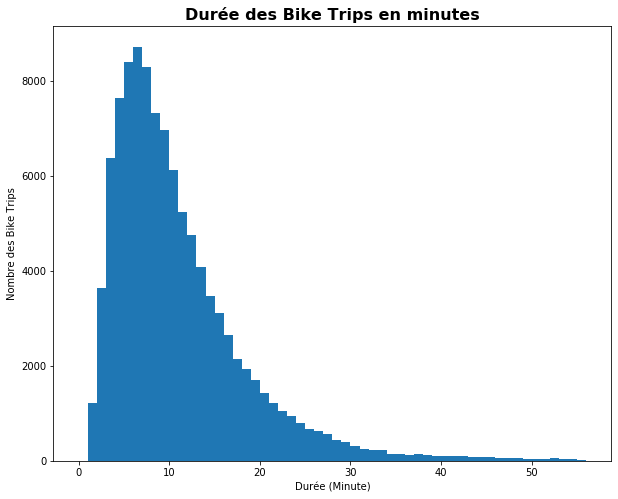

In [0]:
# Durée des balades à vélo en minutes
plt.figure(figsize=(10, 8))
binsize = 1
bins = np.arange(0, pandas_df_final['duration_minute'].max() + binsize, binsize)

plt.hist(data = pandas_df_final, x = 'duration_minute', bins = bins);

plt.title("Durée des Bike Trips en minutes", fontsize=16, fontweight='bold')
plt.xlabel('Durée (Minute)')
plt.ylabel('Nombre des Bike Trips');

Nous avons observé que la variable ***duration_minute*** formait un graphique à asymétrie positive, où la majorité des trajets a une durée comprise entre 5 et 10 minutes.

* Maintenant, on affiche la distribution des fonctionnalités ***datetime***

In [0]:
# la palette des couleurs
base_color = sb.color_palette()[0]

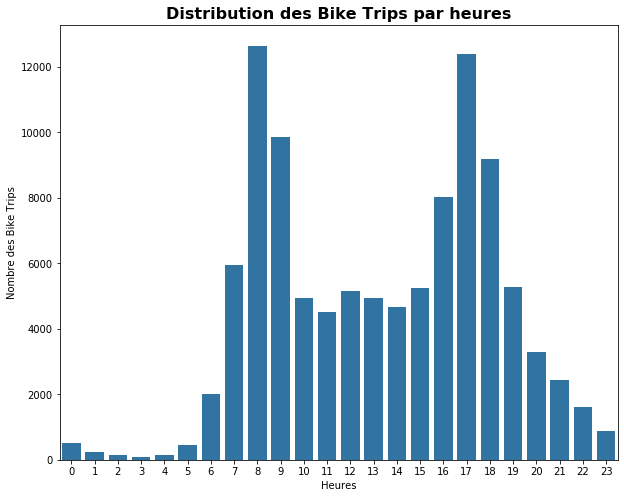

In [0]:
# Dessiner la distribution par "start_time_hour"
plt.figure(figsize=(10, 8))
sb.countplot(data = pandas_df_final, x = 'start_time_hour', color = base_color);
plt.title("Distribution des Bike Trips par heures", fontsize=16, fontweight='bold')
plt.xlabel('Heures')
plt.ylabel('Nombre des Bike Trips');

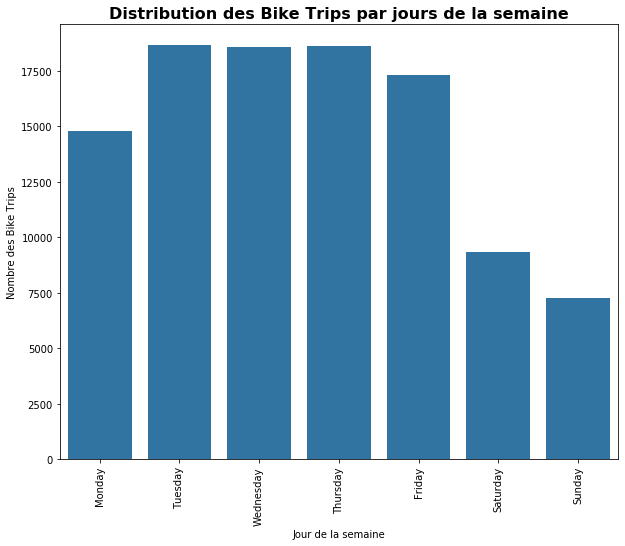

In [0]:
# Déssiner la distribution par "time_day_of_week"
plt.figure(figsize=(10, 8))
sb.countplot(data = pandas_df_final, x = 'time_day_of_week', color = base_color);
plt.xticks(rotation=90)
plt.title("Distribution des Bike Trips par jours de la semaine", fontsize=16, fontweight='bold')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre des Bike Trips');

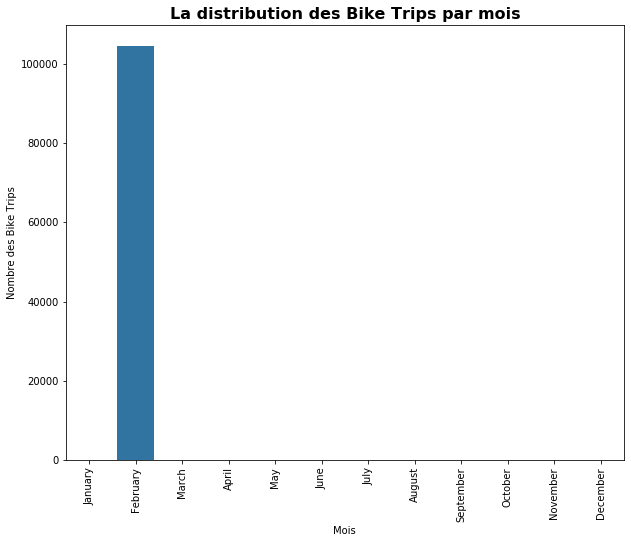

In [0]:
# Dessiner la distribution par "time_month"
plt.figure(figsize=(10, 8))
sb.countplot(data = pandas_df_final, x = 'time_month', color = base_color);
plt.xticks(rotation=90)
plt.title("La distribution des Bike Trips par mois", fontsize=16, fontweight='bold')
plt.xlabel('Mois')
plt.ylabel('Nombre des Bike Trips');

Dans le tracé des variables temporelles, certaines choses ressortent :

* Lorsque nous regardons chaque heure, nous voyons un pic de déplacement entre 7 et 10 et un autre pic entre 16 et 20;

* Quand on regarde les jours de la semaine, on remarque que du lundi au vendredi nous avons la plupart des trajets avec des pics entre le mardi et le jeudi et des minimums le week-end;

* Quand on regarde le niveau mensuel, on voit seulement la distribution du mois Février, car notre dataSet de base est dans ce mois-ci.

* Maintenant, on regarde la distribution de la fonctionnalité ***utilisateur***

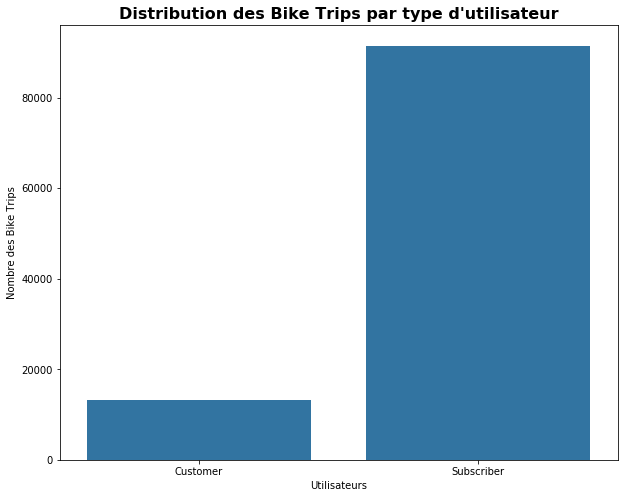

In [0]:
# Dessiner la distribution par "user_type"
plt.figure(figsize=(10, 8))
sb.countplot(data = pandas_df_final, x = 'user_type', color = base_color);
plt.title("Distribution des Bike Trips par type d'utilisateur", fontsize=16, fontweight='bold')
plt.xlabel('Utilisateurs')
plt.ylabel('Nombre des Bike Trips');

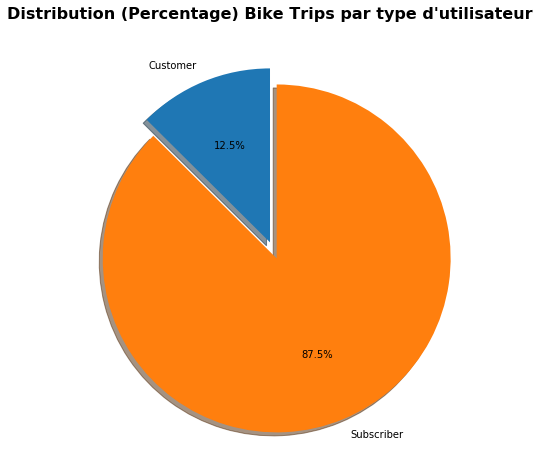

In [0]:
# Dessiner la distribution Pie par "user_type"
plt.figure(figsize=(10, 8))
plt.title("Distribution (Percentage) Bike Trips par type d'utilisateur", fontsize=16, fontweight='bold')
labels = ['Customer', 'Subscriber']
data = [(pandas_df_final['user_type'].value_counts(normalize=True) * 100)['Customer'], (pandas_df_final['user_type'].value_counts(normalize=True) * 100)['Subscriber']]

plt.pie(data, explode=(0, 0.1), labels = labels, autopct='%1.1f%%', shadow=True, startangle=90);

On voit ici que plus de 87,5% des utilisateurs qui utilisent les services sont des abonnés.

Nous notons que la majorité des déplacements a une durée comprise entre 5 et 10 minutes et que du lundi au vendredi, nous avons la majorité des déplacements, principalement dans les heures de trajet des personnes qui se déplacent pour partir/revenir du travail.

* Commençons par comparaison de la durée des trajets par les autres fonctionnalités.

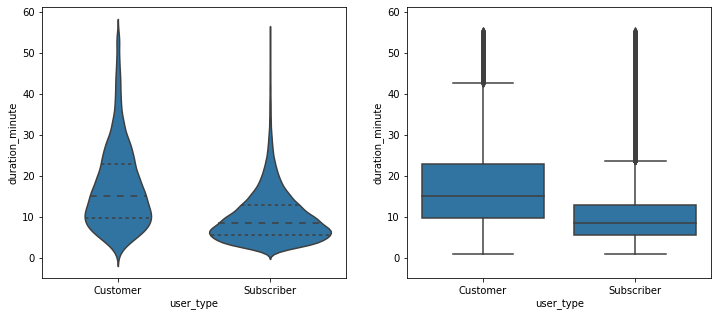

In [0]:
# Dessin d'une bivariance entre "duration_minute" et "user_type"
plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = pandas_df_final, x = 'user_type', y = 'duration_minute', color = base_color, inner='quartile')

plt.subplot(1, 2, 2)
sb.boxplot(data = pandas_df_final, x = 'user_type', y = 'duration_minute', color = base_color)

plt.ylim(ax1.get_ylim());


Nous voyons que les utilisateurs "Customer" ont tendance à effectuer des trajets plus longs que les utilisateurs "Subscriber".

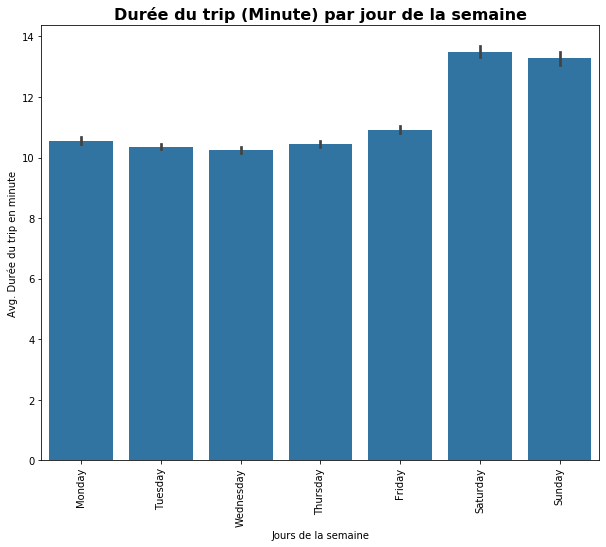

In [0]:
# Dessin d'une bivariance entre "time_day_of_week" et "duration_minute"
plt.figure(figsize=(10, 8))
sb.barplot(data=pandas_df_final, x='time_day_of_week', y='duration_minute', color=base_color);
plt.xticks(rotation=90)
plt.title("Durée du trip (Minute) par jour de la semaine", fontsize=16, fontweight='bold')
plt.xlabel('Jours de la semaine');
plt.ylabel('Avg. Durée du trip en minute');

Nous avons observé que pendant les week-ends, les gens ont tendance à faire des trajets plus longs.

* Comparons ***user_type*** par les autres fonctionnalités

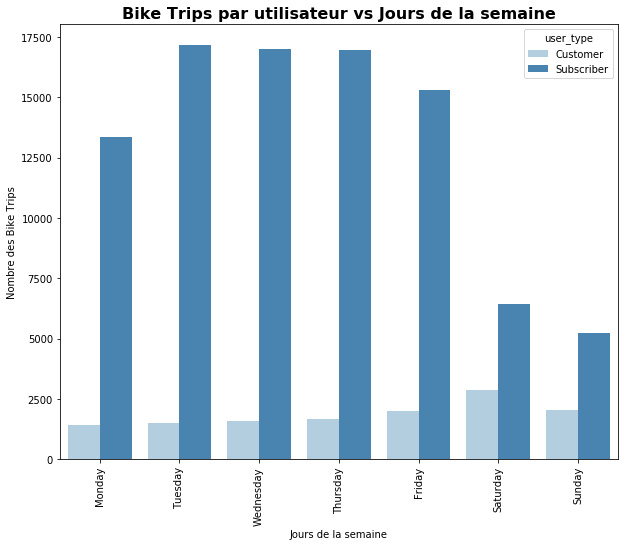

In [0]:
# Dessin d'une bivariance entre "time_day_of_week" et "user_type"
plt.figure(figsize=(10, 8))
sb.countplot(data = pandas_df_final, x = 'time_day_of_week', hue = 'user_type', palette = 'Blues')
plt.xticks(rotation=90)
plt.title("Bike Trips par utilisateur vs Jours de la semaine", fontsize=16, fontweight='bold')
plt.xlabel('Jours de la semaine');
plt.ylabel('Nombre des Bike Trips');

Ici, nous constatons une forte baisse du nombre d'abonnés le week-end, tandis que le client utilisateur a moins d'impact.

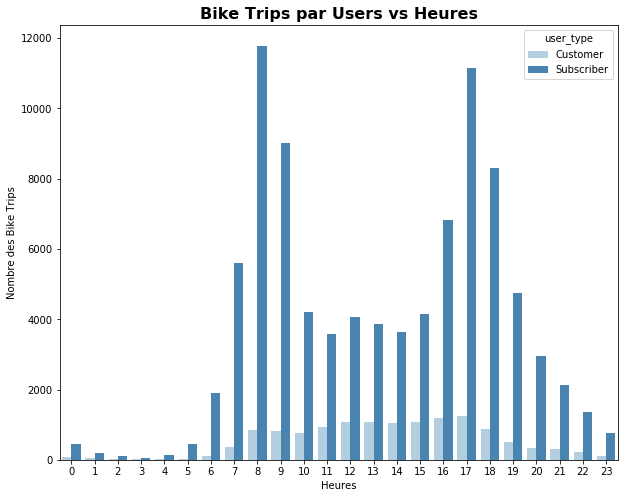

In [0]:
# Dessin d'une bivariance entre "time_day_of_week" et "user_type"
plt.figure(figsize=(10, 8))
sb.countplot(data = pandas_df_final, x = 'start_time_hour', hue = 'user_type', palette = 'Blues')
plt.title("Bike Trips par Users vs Heures", fontsize=16, fontweight='bold')
plt.xlabel('Heures');
plt.ylabel('Nombre des Bike Trips');

Là encore, on remarque la tendance à l'augmentation des déplacements aux heures de 7 à 10 et de 16 à 20, principalement pour les utilisateurs "Subscriber". 

Les utilisateurs "Customer" suivent la tendance plus discrète avec plus de déplacements dans l'après-midi.

L'habitude des déplacements varie beaucoup entre "Subscriber" et "Customer". Le "Subscriber" utilise le système de partage de vélos pendant les heures de travail, de sorte que la plupart des déplacements ont eu lieu en semaine (du lundi au vendredi) et surtout aux heures de pointe (lorsque vous travaillez le matin et partez l'après-midi), tandis que les "Customer" s'amusent généralement dans l'après-midi ou le week-end.

Je comparerai la durée moyenne du trajet en minute le ***user_type*** par les autres fonctionnalités

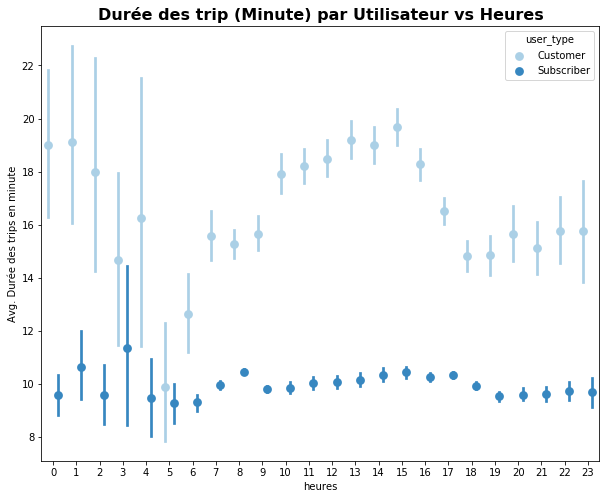

In [0]:
# Dessiner une multivariace entre Avg. Durée (minute) par "start_time_hour" et "user_type"
fig = plt.figure(figsize=(10, 8))
ax = sb.pointplot(data = pandas_df_final, x = 'start_time_hour', y = 'duration_minute', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Durée des trip (Minute) par Utilisateur vs Heures', fontsize=16, fontweight='bold')
plt.ylabel('Avg. Durée des trips en minute')
plt.xlabel('heures');
ax.set_yticklabels([],minor = True)
plt.show();

Nous avons remarqué que la durée moyenne du trajet horaire, met le "Customer" avec une augmentation du temps pendant les heures de l'après-midi, tandis que le "Subscriber" a peu de variation pendant la journée des heures ouvrables.

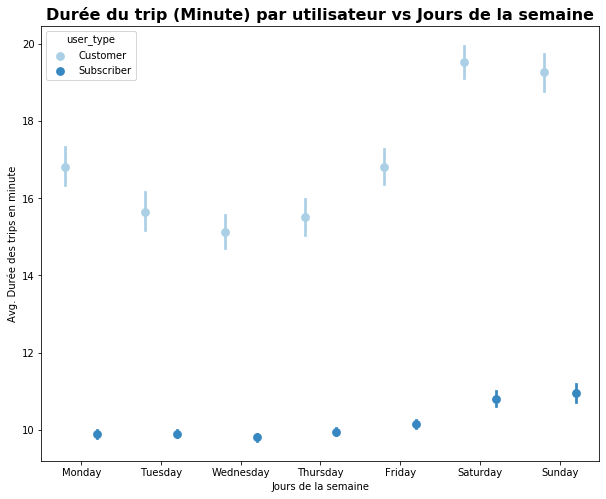

In [0]:
# Dessin d'une multivariate de Avg. Durée (minute) par "time_day_of_week" vs "user_type"
fig = plt.figure(figsize=(10, 8))
ax = sb.pointplot(data = pandas_df_final, x = 'time_day_of_week', y = 'duration_minute', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Durée du trip (Minute) par utilisateur vs Jours de la semaine', fontsize=16, fontweight='bold')
plt.ylabel('Avg. Durée des trips en minute')
plt.xlabel('Jours de la semaine');
ax.set_yticklabels([],minor = True)
plt.show();

Nous avons également observé que le "Customer" passait plus de temps en déplacements durant le week-end, tandis que le "Subscriber" a peu de volatilité pour le week-end.